[3320.411366853326, 1628.4780554192564, 2323.1012357774134, 1154.8681665251504]
[6508.006279032519, 3191.8169886217424, 4553.27842212373, 2263.541606389295]
[33312.10747554433, 41861.85954107339, 39493.3049413989, 47743.55096926713]


<IPython.core.display.Javascript object>


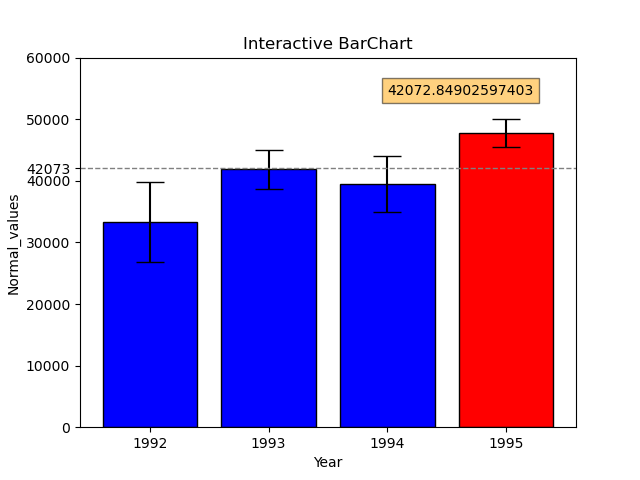

9

In [121]:
%matplotlib notebook

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


np.random.seed(12345)


df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
df = df.T
df.head()
x1 = np.mean(df[1992])
x2 = np.mean(df[1993])
x3 = np.mean(df[1994])
x4 = np.mean(df[1995])
list_means = [x1,x2,x3,x4]
stde1 = np.std(df[1992])/np.sqrt(len(df[1992]))
stde2 = np.std(df[1993])/np.sqrt(len(df[1993]))
stde3 = np.std(df[1994])/np.sqrt(len(df[1994]))
stde4 = np.std(df[1995])/np.sqrt(len(df[1995]))
list_stde = [stde1, stde2, stde3, stde4]
#list_stde = [np.sqrt(len(df[1992])),std1993/np.sqrt(len(df[1993])),std1994/np.sqrt(len(df[1994])),std1995/np.sqrt(len(df[1995]))]
yerror1 = stde1 * 1.96
yerror2 = stde2 * 1.96
yerror3 = stde3 * 1.96
yerror4 = stde4 * 1.96
list_means_errors = [yerror1, yerror2, yerror3, yerror4]
print(list_stde)
print(list_means_errors)
print(list_means)
plt.figure()
xvals = range(len(list_means))
for i in range(0,len(list_means)):
    plt.bar(xvals[i], list_means[i],edgecolor='black',color='grey', yerr=list_means_errors[i], capsize=10)
plt.ylim(0, 55000)
plt.xticks(np.arange(-0, 3.5, step=1), ['1992', '1993', '1994', '1995'])
ax = plt.gca()
ax.set_xlabel('Year')
ax.set_ylabel('Normal_values')
ax.set_title('Interactive BarChart')
y = np.mean(list_means)  
#bar_height = y
horizontal_line = plt.axhline(y=y, color='gray', linewidth=1, linestyle='--')
#colors = []



def onpick(event):
    plt.cla()
    plt.ylim(0, 55000)
    plt.xticks(np.arange(-0, 3.5, step=1), ['1992', '1993', '1994', '1995'])
    ax = plt.gca()
    ax.set_xlabel('Year')
    ax.set_ylabel('Normal_values')
    ax.set_title('Interactive BarChart')
    y = event.ydata
    horizontal_line = plt.axhline(y=y, color='gray', linewidth=1, linestyle='--')
    value = ax.get_yticks()
    horizontal_line.set_ydata(event.ydata)        
    ytick = np.append(value, y)
    tick = ax.set_yticks(ytick)
    plt.text(2,54000, '{}'.format(y),bbox=dict(facecolor='orange', alpha=0.5))
    for i in range(len(list_means)):
        if y < list_means[i]:     
            plt.bar(xvals[i], list_means[i],edgecolor='black',color='red', yerr=list_means_errors[i], capsize=10)
        elif y > list_means[i]:
            plt.bar(xvals[i], list_means[i],edgecolor='black',color='blue', yerr=list_means_errors[i], capsize=10)
        else:
            plt.bar(xvals[i], list_means[i],edgecolor='black',color='white', yerr=list_means_errors[i], capsize=10) 
# tell mpl_connect we want to pass a 'pick_event' into onpick when the even
plt.gcf().canvas.mpl_connect('button_press_event', onpick)
